In [ ]:
!unzip Image_classification_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: patch_images/2445.png   
  inflating: patch_images/19898.png  
  inflating: patch_images/10102.png  
  inflating: patch_images/1164.png   
  inflating: patch_images/9538.png   
  inflating: patch_images/7515.png   
  inflating: patch_images/11234.png  
  inflating: patch_images/3773.png   
  inflating: patch_images/19668.png  
  inflating: patch_images/5302.png   
  inflating: patch_images/18576.png  
  inflating: patch_images/17645.png  
  inflating: patch_images/5464.png   
  inflating: patch_images/18210.png  
  inflating: patch_images/17123.png  
  inflating: patch_images/10894.png  
  inflating: patch_images/21491.png  
  inflating: patch_images/11552.png  
  inflating: patch_images/20957.png  
  inflating: patch_images/3015.png   
  inflating: patch_images/22198.png  
  inflating: patch_images/15734.png  
  inflating: patch_images/8140.png   
  inflating: patch_images/7273.png   
  inflating: patch_images/396.png    

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import seaborn as sns


# Load the dataset
df = pd.read_csv("data_labels_mainData.csv")

# Define the image directory
img_dir = "patch_images"

# # Visualize the images
# fig, axs = plt.subplots(3, 3, figsize=(10, 10))
# for i, ax in enumerate(axs.flat):
#     img_path = os.path.join(img_dir, df.loc[i, "ImageName"])
#     img = Image.open(img_path)
#     ax.imshow(img)
#     ax.set_title(df.loc[i, "cellTypeName"])
# plt.show()

# Check the image dimensions
sizes = set()
for name in df["ImageName"]:
    img_path = os.path.join(img_dir, name)
    img = Image.open(img_path)
    sizes.add(img.size)
print(f"Image sizes: {sizes}")

# Check the image channels
channels = set()
for name in df["ImageName"]:
    img_path = os.path.join(img_dir, name)
    img = Image.open(img_path)
    channels.add(len(img.getbands()))
print(f"Image channels: {channels}")

# Check the class distribution
class_counts = df["cellTypeName"].value_counts()
print(f"Class distribution: \n{class_counts}")

# Compute image statistics
mean_pixel = np.array([0, 0, 0], dtype=np.float64)  # Change dtype to float64
std_pixel = np.array([0, 0, 0], dtype=np.float64)  # Change dtype to float64
for name in df["ImageName"]:
    img_path = os.path.join(img_dir, name)
    img = Image.open(img_path)
    pixel_values = np.array(img.getdata())
    mean_pixel += np.mean(pixel_values, axis=0)
    std_pixel += np.std(pixel_values, axis=0)
mean_pixel /= float(len(df))  # Change division to floating point division
std_pixel /= float(len(df))   # Change division to floating point division
print(f"Mean pixel value: {mean_pixel}")
print(f"Std dev of pixel values: {std_pixel}")

# Check for outliers
outliers = []
for name in df["ImageName"]:
    img_path = os.path.join(img_dir, name)
    img = Image.open(img_path)
    pixel_values = np.array(img.getdata())
    if np.any(pixel_values > 255) or np.any(pixel_values < 0):
        outliers.append(name)
print(f"Outliers: {outliers}")

Image sizes: {(27, 27)}
Image channels: {3}
Class distribution: 
epithelial      4079
inflammatory    2543
fibroblast      1888
others          1386
Name: cellTypeName, dtype: int64
Mean pixel value: [193.56496092 150.12985821 205.31894543]
Std dev of pixel values: [38.15567203 41.74090031 27.33528803]
Outliers: []


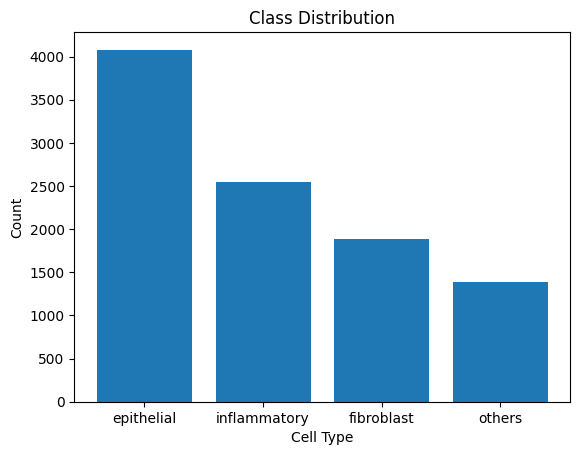

In [ ]:
# Visualize class distribution
class_counts = df["cellTypeName"].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.title("Class Distribution")
plt.xlabel("Cell Type")
plt.ylabel("Count")
plt.show()

   InstanceID  patientID  ImageName cellTypeName  cellType  isCancerous
0       22405          1  22405.png   fibroblast         0            0
1       22406          1  22406.png   fibroblast         0            0
2       22407          1  22407.png   fibroblast         0            0
3       22408          1  22408.png   fibroblast         0            0
4       22409          1  22409.png   fibroblast         0            0
InstanceID      0
patientID       0
ImageName       0
cellTypeName    0
cellType        0
isCancerous     0
dtype: int64
         InstanceID    patientID     cellType  isCancerous
count   9896.000000  9896.000000  9896.000000  9896.000000
mean   10193.880154    29.762025     1.501516     0.412187
std     6652.912660    17.486553     0.954867     0.492253
min        1.000000     1.000000     0.000000     0.000000
25%     4135.750000    14.000000     1.000000     0.000000
50%     9279.500000    26.000000     2.000000     0.000000
75%    16821.250000    47.000000  

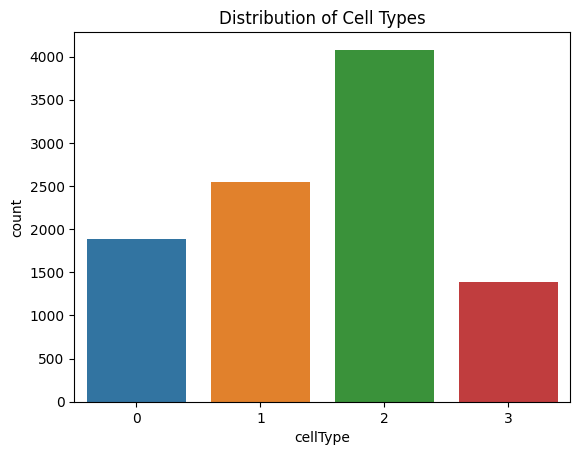

In [ ]:
# Print the first few rows to get an idea of the data
print(df.head())

# Check for missing values
print(df.isna().sum())

# Get descriptive statistics for numerical columns
print(df.describe())

# Visualize the distribution of the target variable "cellType"
sns.countplot(x="cellType", data=df)
plt.title("Distribution of Cell Types")
plt.show()


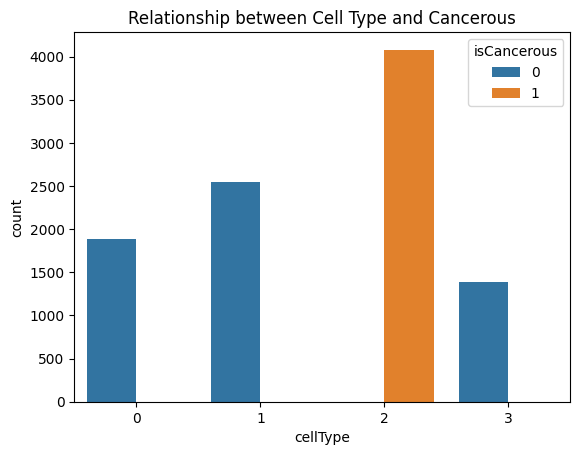

In [ ]:
# Visualize the relationship between "cellType" and "isCancerous"
sns.countplot(x="cellType", hue="isCancerous", data=df)
plt.title("Relationship between Cell Type and Cancerous")
plt.show()


<h3>Images for Various Cell Types</h3>

In [ ]:
fibroblast = df.loc[df['cellType']==0].sample(8)
inflammatory = df.loc[df['cellType']==1].sample(8)
epithelial = df.loc[df['cellType']==2].sample(8)
others = df.loc[df['cellType']==3].sample(8)

In [ ]:
def plot_images(df,title):
  fig = plt.figure(figsize = (5,5))
  for i, img in enumerate(df):
    fig.add_subplot(2,4,i+1)
    plt.imshow(Image.open(img))
    plt.axis('off')
    fig.suptitle(title, fontsize = 10) 
  plt.tight_layout(rect = [0, 0.03, 1, 0.95])
  return plt.show()

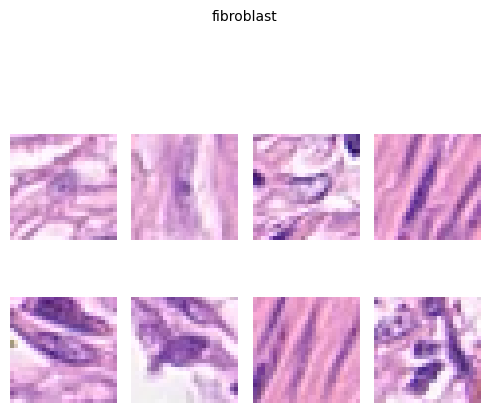

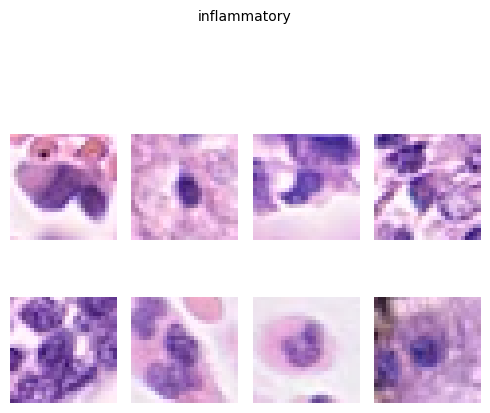

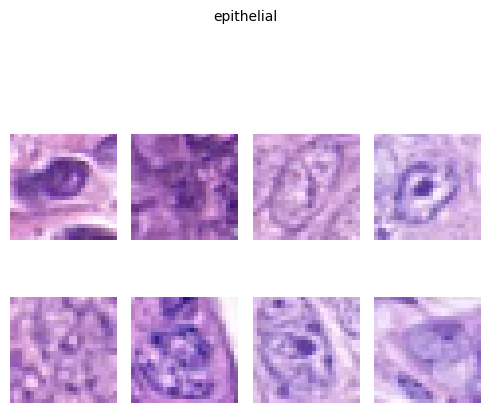

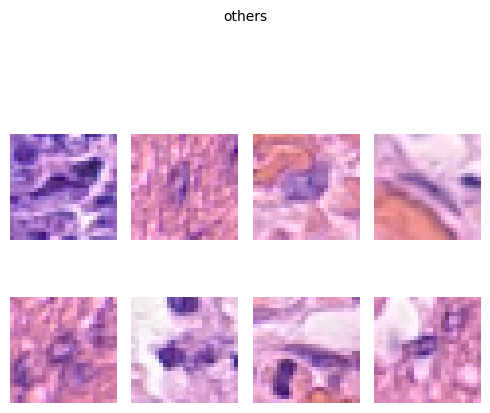

In [ ]:
img_labels = [fibroblast,inflammatory,epithelial,others]
for labels in img_labels:
  label = str(labels['cellTypeName'].iloc[0])
  image_path = "patch_images/" + labels['ImageName']
  plot_images(image_path,label)

<h3>Images of cancerous and non-cancerous cells</h3>

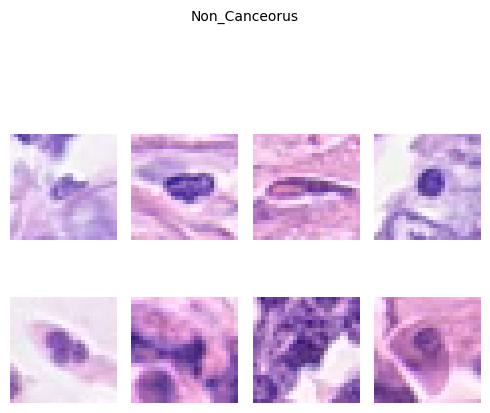

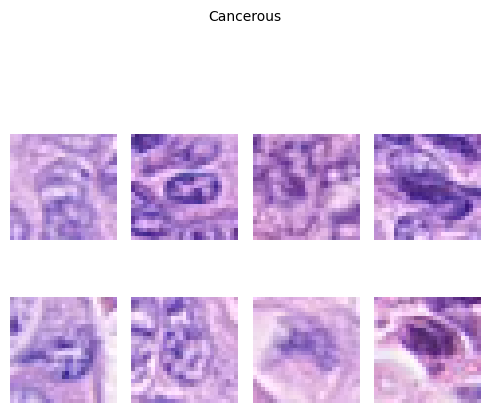

In [ ]:
cancer = df.loc[df['isCancerous']==1].sample(8)
not_cancer = df.loc[df['isCancerous']==0].sample(8)

isCancerous = [not_cancer,cancer]
can_label  = ['Non_Canceorus','Cancerous']
for i, labels in enumerate(isCancerous):
  image_path = "patch_images/" + labels['ImageName']
  plot_images(image_path,can_label[i])